In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
import datetime

In [6]:
df = pd.read_csv('testLong.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(df)

          Month          Hash    Difficulty  Addresses
0    2009-01-10  3.032326e-06  1.000000e+00         61
1    2009-01-11  4.623055e-06  1.000000e+00         95
2    2009-01-12  4.672765e-06  1.000000e+00        101
3    2009-01-13  6.114363e-06  1.000000e+00        123
4    2009-01-14  6.412625e-06  1.000000e+00        133
...         ...           ...           ...        ...
5026 2022-10-15  2.690738e+08  3.561079e+13     838678
5027 2022-10-16  2.549120e+08  3.561079e+13     769067
5028 2022-10-17  2.655333e+08  3.561079e+13     870371
5029 2022-10-18  2.513715e+08  3.561079e+13     887194
5030 2022-10-19  2.673035e+08  3.561079e+13     923688

[5031 rows x 4 columns]


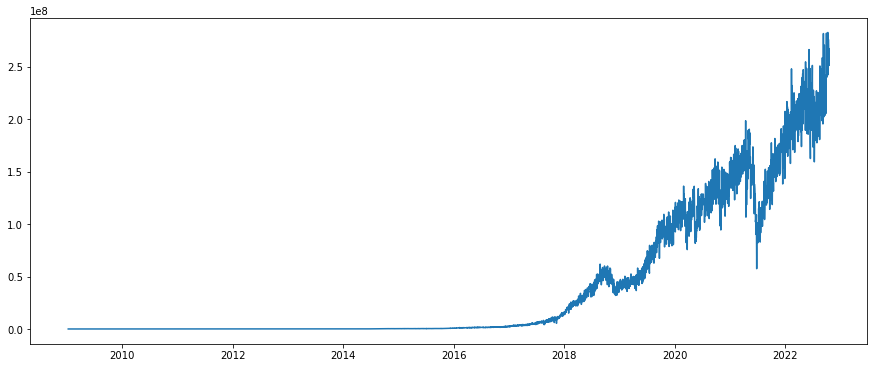

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(df['Month'], df['Hash'])

In [35]:
train = df[:int(len(df)*0.9)]
test = df[int(0.9*len(df)):]
train.drop(['Difficulty', 'Addresses'], axis = 1)
test.drop(['Difficulty', 'Addresses'], axis = 1)

,Month,Hash
4527,2021-06-03,153804388.7
4528,2021-06-04,137063775.1
4529,2021-06-05,137063775.1
4530,2021-06-06,156943254.8
4531,2021-06-07,139156352.0
...,...,...
5026,2022-10-15,269073772.4
5027,2022-10-16,254911993.9
5028,2022-10-17,265533327.8
5029,2022-10-18,251371549.2


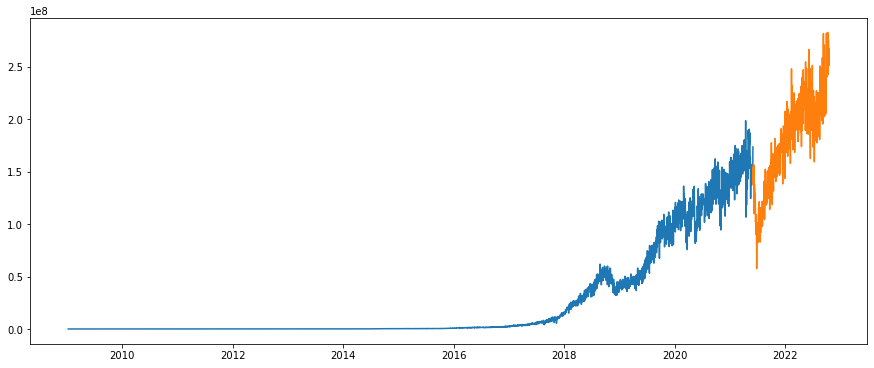

In [36]:
plt.figure(figsize=(15, 6))
plt.plot(train['Month'], train['Hash'])
plt.plot(test['Month'], test['Hash'])

In [105]:
model = pm.auto_arima(np.log(train['Hash']))

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered

In [116]:
prediction = pd.DataFrame(model.predict(n_periods = 10000), index = test.index)
prediction.columns = ['predicted_sales']
print(prediction)

      predicted_sales
4527        18.897706
4528        18.882410
4529        18.883399
4530        18.877683
4531        18.874810
...               ...
5026        18.929011
5027        18.929129
5028        18.929246
5029        18.929364
5030        18.929481

[504 rows x 1 columns]


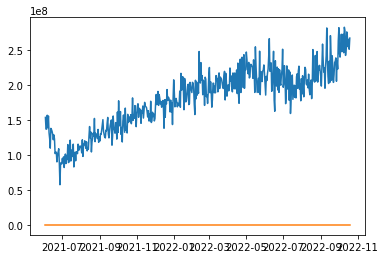

In [117]:
# #plt.plot(train['Month'], train['Hash'])
# plt.plot(test['Month'], test['Hash'], label = 'Test')
# plt.plot(test['Month'], prediction['predicted_sales'], label = 'pred')
# plt.show()

In [108]:
preds, conf_int = model.predict(n_periods=test.shape[0], return_conf_int=True)

In [109]:
# x_axis = np.arange(train.shape[0] + preds.shape[0])
# x_years = x_axis + 2021 # Year starts at 1821

# plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
# plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
# plt.scatter(x_years[x_axis[train.shape[0]:]], test,
#             alpha=0.4, marker='x')  # Test data
# plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
#                  conf_int[:, 0], conf_int[:, 1],
#                  alpha=0.1, color='b')
# plt.title("Lynx forecasts")
# plt.xlabel("Year")

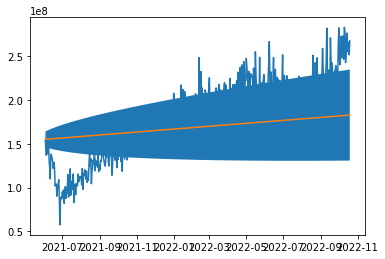

In [85]:
# plt.fill_between(test['Month'], conf_int[:, 0], conf_int[:, 1])
# plt.plot(test['Month'], test['Hash'], label = 'Test')
# plt.plot(test['Month'], prediction['predicted_sales'], label = 'pred')
# plt.show()

In [110]:
dates = pd.date_range(start='21-OCT-2022', end='31-DEC-2030').to_frame()
dates['Month'] = dates.index
dates['Hash'] = 0
print(dates.columns)
dates.drop([0], axis = 1, inplace = True)
#print(dates)

Index([0, 'Month', 'Hash'], dtype='object')


In [111]:
new = pd.concat([test, dates])
print(new)

                         Month         Hash    Difficulty  Addresses
4527                2021-06-03  153804388.7  2.104773e+13  1015474.0
4528                2021-06-04  137063775.1  2.104773e+13   907519.0
4529                2021-06-05  137063775.1  2.104773e+13   762659.0
4530                2021-06-06  156943254.8  2.104773e+13   737174.0
4531                2021-06-07  139156352.0  2.104773e+13   910652.0
...                        ...          ...           ...        ...
2030-12-27 00:00:00 2030-12-27          0.0           NaN        NaN
2030-12-28 00:00:00 2030-12-28          0.0           NaN        NaN
2030-12-29 00:00:00 2030-12-29          0.0           NaN        NaN
2030-12-30 00:00:00 2030-12-30          0.0           NaN        NaN
2030-12-31 00:00:00 2030-12-31          0.0           NaN        NaN

[3498 rows x 4 columns]


In [112]:
preds, conf_int = model.predict(n_periods=new.shape[0], return_conf_int=True)

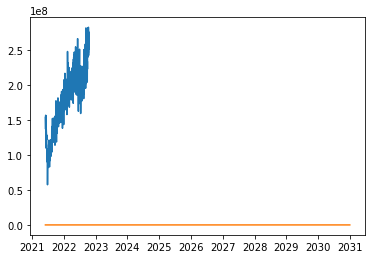

In [115]:
plt.fill_between(new['Month'], conf_int[:, 0], conf_int[:, 1])
plt.plot(test['Month'], test['Hash'], label = 'Test')
plt.plot(new['Month'], preds, label = 'pred')
plt.show()